### Markovian Market Project

"Today is a window, tomorrow the landscape" (G.Graffin, 1994)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from faker import Faker

from datetime import datetime, timedelta

In [4]:
dfm = pd.read_csv('../data/monday.csv',delimiter=';')
dft = pd.read_csv('../data/tuesday.csv',delimiter=';')
dfw = pd.read_csv('../data/wednesday.csv',delimiter=';')
dfth = pd.read_csv('../data/thursday.csv',delimiter=';')
dff = pd.read_csv('../data/friday.csv',delimiter=';')

In [5]:
dfm.head(5)

,timestamp,customer_no,location
0,2019-09-02 07:03:00,1,dairy
1,2019-09-02 07:03:00,2,dairy
2,2019-09-02 07:04:00,3,dairy
3,2019-09-02 07:04:00,4,dairy
4,2019-09-02 07:04:00,5,spices


In [6]:
dfm.describe()

,customer_no
count,4884.000000
mean,718.274365
std,411.839636
min,1.000000
25%,366.000000
50%,720.000000
75%,1070.000000
max,1447.000000


In [7]:
dfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4884 entries, 0 to 4883
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    4884 non-null   object
 1   customer_no  4884 non-null   int64 
 2   location     4884 non-null   object
dtypes: int64(1), object(2)
memory usage: 114.6+ KB


In [8]:
dfm.columns

Index(['timestamp', 'customer_no', 'location'], dtype='object')

In [9]:
dfm.index

RangeIndex(start=0, stop=4884, step=1)

In [10]:
dfm.shape

(4884, 3)

In [11]:
n_m = dfm['customer_no'].nunique()
n_m

1447

In [12]:
dfm.index

RangeIndex(start=0, stop=4884, step=1)

Resample:

In [13]:
dfm.set_index('timestamp', inplace=True)

In [14]:
dfm.index

Index(['2019-09-02 07:03:00', '2019-09-02 07:03:00', '2019-09-02 07:04:00',
       '2019-09-02 07:04:00', '2019-09-02 07:04:00', '2019-09-02 07:04:00',
       '2019-09-02 07:04:00', '2019-09-02 07:04:00', '2019-09-02 07:05:00',
       '2019-09-02 07:05:00',
       ...
       '2019-09-02 21:48:00', '2019-09-02 21:49:00', '2019-09-02 21:49:00',
       '2019-09-02 21:49:00', '2019-09-02 21:49:00', '2019-09-02 21:49:00',
       '2019-09-02 21:49:00', '2019-09-02 21:49:00', '2019-09-02 21:50:00',
       '2019-09-02 21:50:00'],
      dtype='object', name='timestamp', length=4884)

In [15]:
dfm.index = pd.to_datetime(dfm.index)

In [16]:
dfm.index

DatetimeIndex(['2019-09-02 07:03:00', '2019-09-02 07:03:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:04:00', '2019-09-02 07:04:00',
               '2019-09-02 07:05:00', '2019-09-02 07:05:00',
               ...
               '2019-09-02 21:48:00', '2019-09-02 21:49:00',
               '2019-09-02 21:49:00', '2019-09-02 21:49:00',
               '2019-09-02 21:49:00', '2019-09-02 21:49:00',
               '2019-09-02 21:49:00', '2019-09-02 21:49:00',
               '2019-09-02 21:50:00', '2019-09-02 21:50:00'],
              dtype='datetime64[ns]', name='timestamp', length=4884, freq=None)

In [17]:
dfm_res = dfm.groupby(['customer_no']).resample('min').ffill()
dfm_res

customer_no  location
customer_no timestamp                                 
1           2019-09-02 07:03:00            1     dairy
            2019-09-02 07:04:00            1     dairy
            2019-09-02 07:05:00            1  checkout
2           2019-09-02 07:03:00            2     dairy
            2019-09-02 07:04:00            2     dairy
...                                      ...       ...
1444        2019-09-02 21:48:00         1444    spices
            2019-09-02 21:49:00         1444  checkout
1445        2019-09-02 21:49:00         1445     dairy
1446        2019-09-02 21:50:00         1446     dairy
1447        2019-09-02 21:50:00         1447     fruit

[10765 rows x 2 columns]

Number of distinct customer in each section:

In [18]:
dfm.groupby('location').count()

,customer_no
location,
checkout,1437
dairy,895
drinks,797
fruit,1005
spices,750


only 1437 out 1447 went officially through checkout on monday 

Total number of customers in each section over time:

In [19]:
dfm_res.groupby(['timestamp','location']).count()

customer_no
timestamp           location             
2019-09-02 07:03:00 dairy               2
2019-09-02 07:04:00 dairy               4
                    fruit               1
                    spices              3
2019-09-02 07:05:00 checkout            2
...                                   ...
2019-09-02 21:49:00 dairy               1
                    fruit               2
                    spices              2
2019-09-02 21:50:00 dairy               1
                    fruit               1

[3777 rows x 1 columns]

Customers at checkout over time:

In [20]:
dfm_t = dfm[dfm['location']=='checkout'].groupby('timestamp')['location'].count()
dfm_t

timestamp
2019-09-02 07:05:00    2
2019-09-02 07:06:00    2
2019-09-02 07:07:00    1
2019-09-02 07:08:00    3
2019-09-02 07:09:00    1
                      ..
2019-09-02 21:44:00    1
2019-09-02 21:46:00    1
2019-09-02 21:47:00    2
2019-09-02 21:48:00    2
2019-09-02 21:49:00    2
Name: location, Length: 700, dtype: int64

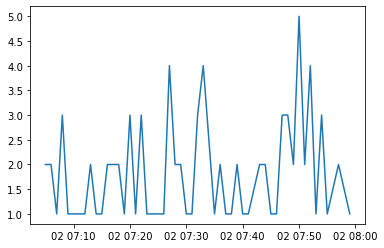

In [21]:
plt.plot( dfm_t.index[0:50], dfm_t[0:50])

In [22]:
dfm[dfm['location']=='checkout'].groupby('timestamp').count().index

DatetimeIndex(['2019-09-02 07:05:00', '2019-09-02 07:06:00',
               '2019-09-02 07:07:00', '2019-09-02 07:08:00',
               '2019-09-02 07:09:00', '2019-09-02 07:10:00',
               '2019-09-02 07:11:00', '2019-09-02 07:12:00',
               '2019-09-02 07:13:00', '2019-09-02 07:14:00',
               ...
               '2019-09-02 21:32:00', '2019-09-02 21:33:00',
               '2019-09-02 21:34:00', '2019-09-02 21:36:00',
               '2019-09-02 21:37:00', '2019-09-02 21:44:00',
               '2019-09-02 21:46:00', '2019-09-02 21:47:00',
               '2019-09-02 21:48:00', '2019-09-02 21:49:00'],
              dtype='datetime64[ns]', name='timestamp', length=700, freq=None)

Time each customer spent in the market:

In [23]:
dfm_res.drop(columns='customer_no', inplace=True)

In [24]:
dfm_res

location
customer_no timestamp                    
1           2019-09-02 07:03:00     dairy
            2019-09-02 07:04:00     dairy
            2019-09-02 07:05:00  checkout
2           2019-09-02 07:03:00     dairy
            2019-09-02 07:04:00     dairy
...                                   ...
1444        2019-09-02 21:48:00    spices
            2019-09-02 21:49:00  checkout
1445        2019-09-02 21:49:00     dairy
1446        2019-09-02 21:50:00     dairy
1447        2019-09-02 21:50:00     fruit

[10765 rows x 1 columns]

In [25]:
dfm_res.index

MultiIndex([(   1, '2019-09-02 07:03:00'),
            (   1, '2019-09-02 07:04:00'),
            (   1, '2019-09-02 07:05:00'),
            (   2, '2019-09-02 07:03:00'),
            (   2, '2019-09-02 07:04:00'),
            (   2, '2019-09-02 07:05:00'),
            (   2, '2019-09-02 07:06:00'),
            (   3, '2019-09-02 07:04:00'),
            (   3, '2019-09-02 07:05:00'),
            (   3, '2019-09-02 07:06:00'),
            ...
            (1442, '2019-09-02 21:47:00'),
            (1442, '2019-09-02 21:48:00'),
            (1442, '2019-09-02 21:49:00'),
            (1443, '2019-09-02 21:47:00'),
            (1443, '2019-09-02 21:48:00'),
            (1444, '2019-09-02 21:48:00'),
            (1444, '2019-09-02 21:49:00'),
            (1445, '2019-09-02 21:49:00'),
            (1446, '2019-09-02 21:50:00'),
            (1447, '2019-09-02 21:50:00')],
           names=['customer_no', 'timestamp'], length=10765)

In [26]:
dfm_res.groupby('customer_no').count()

,location
customer_no,
1,3
2,4
3,3
4,5
5,2
...,...
1443,2
1444,2
1445,1


In [27]:
dfm_res.groupby('customer_no').count().head(10)

,location
customer_no,
1,3
2,4
3,3
4,5
5,2
6,26
7,10
8,4
9,8


Number of customers in the supermarket over time:

In [28]:
dfm_res.groupby('timestamp').count()

,location
timestamp,
2019-09-02 07:03:00,2
2019-09-02 07:04:00,8
2019-09-02 07:05:00,8
2019-09-02 07:06:00,12
2019-09-02 07:07:00,12
...,...
2019-09-02 21:46:00,10
2019-09-02 21:47:00,11
2019-09-02 21:48:00,9


In [29]:
dfm_res.tail(5)

location
customer_no timestamp                    
1444        2019-09-02 21:48:00    spices
            2019-09-02 21:49:00  checkout
1445        2019-09-02 21:49:00     dairy
1446        2019-09-02 21:50:00     dairy
1447        2019-09-02 21:50:00     fruit

In [30]:
dfm.groupby('customer_no')['location'].last()

customer_no
1       checkout
2       checkout
3       checkout
4       checkout
5       checkout
          ...   
1443       dairy
1444    checkout
1445       dairy
1446       dairy
1447       fruit
Name: location, Length: 1447, dtype: object

In [31]:
dfm.groupby('customer_no')['location'].last()[1446]

'dairy'

In [32]:
len(dfm.groupby('customer_no')['location'].last())

1447

In [33]:
range(len(dfm.groupby('customer_no')['location'].last()))

range(0, 1447)

Defining functions to locate lost customers and check them out

In [34]:
lost_customers=[]
for i in range(len(dfm.groupby('customer_no')['location'].last())):      
    if dfm.groupby('customer_no')['location'].last()[i+1] != 'checkout':
               lost_customers.append(i+1) 
len(lost_customers)

10

In [35]:
def lost_customers(df):
    lost_customers=[]
    for i in range(len(df.groupby('customer_no')['location'].last())):     
        if df.groupby('customer_no')['location'].last()[i+1] != 'checkout':
                   lost_customers.append(i+1) 
    n_lost_customers = len(lost_customers)
    return lost_customers, n_lost_customers

In [36]:
lc_list, n_lc = lost_customers(dfw)

In [37]:
lc_list

[1520, 1527, 1528, 1529, 1530]

In [38]:
lost_customers_m, n_lost_customers_m = lost_customers(dfm)

Generating Dataframe with lost customers checkout row

In [39]:
d = {'customer_no': lost_customers_m, 'location': ['checkout']*n_lost_customers_m}

In [40]:
dfm.index[-1]

Timestamp('2019-09-02 21:50:00')

In [41]:
df_lost_customers = pd.DataFrame(data=d, index=[dfm.index[-1]]*n_lost_customers_m)

In [42]:
df_lost_customers

,customer_no,location
2019-09-02 21:50:00,1430,checkout
2019-09-02 21:50:00,1433,checkout
2019-09-02 21:50:00,1437,checkout
2019-09-02 21:50:00,1439,checkout
2019-09-02 21:50:00,1440,checkout
2019-09-02 21:50:00,1441,checkout
2019-09-02 21:50:00,1443,checkout
2019-09-02 21:50:00,1445,checkout
2019-09-02 21:50:00,1446,checkout
2019-09-02 21:50:00,1447,checkout


In [43]:
df_lost_customers.index

DatetimeIndex(['2019-09-02 21:50:00', '2019-09-02 21:50:00',
               '2019-09-02 21:50:00', '2019-09-02 21:50:00',
               '2019-09-02 21:50:00', '2019-09-02 21:50:00',
               '2019-09-02 21:50:00', '2019-09-02 21:50:00',
               '2019-09-02 21:50:00', '2019-09-02 21:50:00'],
              dtype='datetime64[ns]', freq=None)

Checking that locations of one lost customer don't include the checkout

In [44]:
dfm.loc[dfm['customer_no']==1430]

,customer_no,location
timestamp,,
2019-09-02 21:38:00,1430,fruit
2019-09-02 21:42:00,1430,dairy
2019-09-02 21:43:00,1430,fruit
2019-09-02 21:48:00,1430,dairy
2019-09-02 21:49:00,1430,fruit


Incrementing the last timestamp in the given Dataframe by one min

In [45]:
#last timestamp
dfm.loc[dfm['customer_no']==1430].index[-1]

Timestamp('2019-09-02 21:49:00')

What about tuesday?

In [46]:
dft.head(5)

,timestamp,customer_no,location
0,2019-09-03 07:02:00,1,fruit
1,2019-09-03 07:02:00,2,drinks
2,2019-09-03 07:03:00,3,dairy
3,2019-09-03 07:05:00,1,drinks
4,2019-09-03 07:06:00,4,dairy


In [47]:
n_t = dft['customer_no'].nunique()
n_t

1422

In [48]:
n_m

1447

In [49]:
dft.groupby('location').count()

,timestamp,customer_no
location,,
checkout,1420,1420
dairy,911,911
drinks,713,713
fruit,976,976
spices,694,694


so there should be 2 customers lost on tuesday

In [50]:
lost_customers(dft)

([1411, 1422], 2)

In [51]:
dft.loc[dft['customer_no']==1422]

,timestamp,customer_no,location
4708,2019-09-03 21:46:00,1422,spices
4710,2019-09-03 21:47:00,1422,dairy


In [52]:
dft.tail(10)

,timestamp,customer_no,location
4704,2019-09-03 21:44:00,1412,drinks
4705,2019-09-03 21:46:00,1403,checkout
4706,2019-09-03 21:46:00,1420,checkout
4707,2019-09-03 21:46:00,1421,fruit
4708,2019-09-03 21:46:00,1422,spices
4709,2019-09-03 21:47:00,1421,drinks
4710,2019-09-03 21:47:00,1422,dairy
4711,2019-09-03 21:48:00,1421,checkout
4712,2019-09-03 21:49:00,1412,checkout
4713,2019-09-03 21:50:00,1411,dairy


Distribution of the first location:

In [53]:
dfm.groupby('customer_no')['location'].first()

customer_no
1        dairy
2        dairy
3        dairy
4        dairy
5       spices
         ...  
1443     fruit
1444    spices
1445     dairy
1446     dairy
1447     fruit
Name: location, Length: 1447, dtype: object

In [54]:
dfm_1loc = dfm.groupby('customer_no')['location'].first()
dfm_1loc_n = dfm_1loc.value_counts()
dfm_1loc

customer_no
1        dairy
2        dairy
3        dairy
4        dairy
5       spices
         ...  
1443     fruit
1444    spices
1445     dairy
1446     dairy
1447     fruit
Name: location, Length: 1447, dtype: object

In [55]:
dfm_1loc_n

fruit     520
dairy     412
spices    283
drinks    232
Name: location, dtype: int64

In [56]:
n_m = dfm['customer_no'].nunique()
n_m

1447

In [57]:
dfm_1loc_n.index

Index(['fruit', 'dairy', 'spices', 'drinks'], dtype='object')

([<matplotlib.patches.Wedge at 0x1a9f35fa880>,
 [Text(0.47034430518989734, 0.9943722816809774, 'fruit'),
  Text(-1.0999351869533631, -0.01194087525561968, 'dairy'),
  Text(-0.05609881816999984, -1.0985685789243789, 'spices'),
  Text(0.9633845600996074, -0.5309333191293292, 'drinks')],
 [Text(0.2565514391944894, 0.5423848809168966, '35.9%'),
  Text(-0.599964647429107, -0.0065132046848834614, '28.5%'),
  Text(-0.030599355365454457, -0.599219224867843, '19.6%'),
  Text(0.5254824873270585, -0.2895999922523613, '16.0%')])

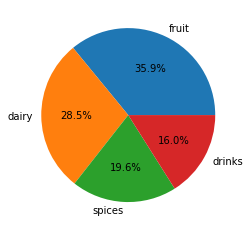

In [58]:
plt.pie(dfm_1loc_n, labels=dfm_1loc_n.index ,autopct='%1.1f%%')

Customers who went first to the fruits:

In [59]:
dfm_1loc = dfm.groupby('customer_no')['location'].first()
dfm_1loc

customer_no
1        dairy
2        dairy
3        dairy
4        dairy
5       spices
         ...  
1443     fruit
1444    spices
1445     dairy
1446     dairy
1447     fruit
Name: location, Length: 1447, dtype: object

In [60]:
dfm_1loc=='fruits'

customer_no
1       False
2       False
3       False
4       False
5       False
        ...  
1443    False
1444    False
1445    False
1446    False
1447    False
Name: location, Length: 1447, dtype: bool

#### Working with the data of all days

Number of customers per day:

Index to Datetimeindex

In [61]:
dfm = pd.read_csv('../data/monday.csv',delimiter=';')
dft = pd.read_csv('../data/tuesday.csv',delimiter=';')
dfw = pd.read_csv('../data/wednesday.csv',delimiter=';')
dfth = pd.read_csv('../data/thursday.csv',delimiter=';')
dff = pd.read_csv('../data/friday.csv',delimiter=';')

In [62]:
dfm.set_index('timestamp',inplace=True)
dfm.index=pd.to_datetime(dfm.index)

In [63]:
dft.set_index('timestamp',inplace=True)
dft.index=pd.to_datetime(dft.index)

dfw.set_index('timestamp',inplace=True)
dfw.index=pd.to_datetime(dfw.index)

dfth.set_index('timestamp',inplace=True)
dfth.index=pd.to_datetime(dfth.index)

dff.set_index('timestamp',inplace=True)
dff.index=pd.to_datetime(dff.index)

In [64]:
n_m = dfm['customer_no'].nunique()
n_t = dft['customer_no'].nunique()
n_w = dfw['customer_no'].nunique()
n_th = dfth['customer_no'].nunique()
n_f = dff['customer_no'].nunique()
n_days = [n_m, n_t, n_w, n_th, n_f]
n_days

[1447, 1422, 1531, 1535, 1510]

In [65]:
df_list = [dfm, dft, dfw, dfth, dff]

Add checkout data for the lost customers using two funtions

In [66]:
def lost_customers(df):
    lost_customers=[]
    for i in range(len(df.groupby('customer_no')['location'].last())):     
        if df.groupby('customer_no')['location'].last()[i+1] != 'checkout':
                   lost_customers.append(i+1) 
    n_lost_customers = len(lost_customers)
    return lost_customers, n_lost_customers

In [67]:
lost_customers(dff)

([1494, 1496, 1500, 1503, 1505, 1506, 1509, 1510], 8)

In [68]:
def checkout_lc(df) :
    """
    this function adds a checkout row for each lost customer to the dataframe
    the selected checkout is the last one registered in the given dataframe +1 min
    """
    lost_customers_list, n_lost_customers = lost_customers(df)
    d = {'customer_no': lost_customers_list, 'location': ['checkout']*n_lost_customers}
    checkout_dt = df.index[-1] + timedelta(minutes=1)
    df_lost_customers = pd.DataFrame(data=d, index=[checkout_dt]*n_lost_customers)
    df_wlc = df.append(df_lost_customers)
    return df_wlc

Check if there are still lost costumers:

In [69]:
dfm_lc = checkout_lc(dfm)
dft_lc = checkout_lc(dft)
dfw_lc = checkout_lc(dfw)
dfth_lc = checkout_lc(dfth)
dff_lc = checkout_lc(dff)

In [70]:
dff_lc

,customer_no,location
2019-09-06 07:00:00,1,dairy
2019-09-06 07:00:00,2,drinks
2019-09-06 07:00:00,3,fruit
2019-09-06 07:01:00,2,checkout
2019-09-06 07:01:00,4,drinks
...,...,...
2019-09-06 21:51:00,1503,checkout
2019-09-06 21:51:00,1505,checkout
2019-09-06 21:51:00,1506,checkout
2019-09-06 21:51:00,1509,checkout


In [71]:
dff_lc.groupby('location').count().loc['checkout'][0]

1510

All 1510 customers were sent home!

In [72]:
dfm_lc.index[-1]

Timestamp('2019-09-02 21:51:00')

Add 100000 x day of the week [0,5] = [Monday, Friday]

In [73]:
dfm_lc['customer_no'] = dfm_lc['customer_no']+100000
dft_lc['customer_no'] = dft_lc['customer_no']+200000
dfw_lc['customer_no'] = dfw_lc['customer_no']+300000
dfth_lc['customer_no'] = dfth_lc['customer_no']+400000
dff_lc['customer_no'] = dff_lc['customer_no']+500000

In [74]:
dfth_lc['customer_no']

2019-09-05 07:00:00    400001
2019-09-05 07:01:00    400002
2019-09-05 07:01:00    400003
2019-09-05 07:01:00    400004
2019-09-05 07:02:00    400001
                        ...  
2019-09-05 21:49:00    401534
2019-09-05 21:49:00    401535
2019-09-05 21:50:00    401527
2019-09-05 21:50:00    401532
2019-09-05 21:50:00    401533
Name: customer_no, Length: 5107, dtype: int64

Resample the daily tables first, there's no need to fill extra gaps

In [75]:
dfm_lc_res = dfm_lc.groupby(['customer_no']).resample('min').ffill()
dft_lc_res = dft_lc.groupby(['customer_no']).resample('min').ffill()
dfw_lc_res = dfw_lc.groupby(['customer_no']).resample('min').ffill()
dfth_lc_res = dfth_lc.groupby(['customer_no']).resample('min').ffill()
dff_lc_res = dff_lc.groupby(['customer_no']).resample('min').ffill()

In [76]:
dfm_lc_res

customer_no  location
customer_no                                           
100001      2019-09-02 07:03:00       100001     dairy
            2019-09-02 07:04:00       100001     dairy
            2019-09-02 07:05:00       100001  checkout
100002      2019-09-02 07:03:00       100002     dairy
            2019-09-02 07:04:00       100002     dairy
...                                      ...       ...
101445      2019-09-02 21:51:00       101445  checkout
101446      2019-09-02 21:50:00       101446     dairy
            2019-09-02 21:51:00       101446  checkout
101447      2019-09-02 21:50:00       101447     fruit
            2019-09-02 21:51:00       101447  checkout

[10789 rows x 2 columns]

Append resampled day tables with lost costumers:

In [77]:
df = dfm_lc_res.append(dft_lc_res).append(dfw_lc_res).append(dfth_lc_res).append(dff_lc_res)

In [78]:
df.head(7)

customer_no  location
customer_no                                           
100001      2019-09-02 07:03:00       100001     dairy
            2019-09-02 07:04:00       100001     dairy
            2019-09-02 07:05:00       100001  checkout
100002      2019-09-02 07:03:00       100002     dairy
            2019-09-02 07:04:00       100002     dairy
            2019-09-02 07:05:00       100002     dairy
            2019-09-02 07:06:00       100002  checkout

New feature: timedelta

In [79]:
b = timedelta(minutes=1)
b

datetime.timedelta(seconds=60)


#### Transition Matrix

In [80]:
#shift -1
#correct: checkout (t+1) is Nan
#transition matrix with crosstab

In [81]:
df.rename(columns={'location':'location_t'},inplace=True)

In [82]:
df['location_t+1'] = df['location_t'].shift(-1)

In [83]:
df.head(7)

customer_no location_t location_t+1
customer_no                                                         
100001      2019-09-02 07:03:00       100001      dairy        dairy
            2019-09-02 07:04:00       100001      dairy     checkout
            2019-09-02 07:05:00       100001   checkout        dairy
100002      2019-09-02 07:03:00       100002      dairy        dairy
            2019-09-02 07:04:00       100002      dairy        dairy
            2019-09-02 07:05:00       100002      dairy     checkout
            2019-09-02 07:06:00       100002   checkout        dairy

In [84]:
df.loc[df['location_t']=='checkout','location_t+1']='checkout'

In [85]:
tm = pd.crosstab(df['location_t'], df['location_t+1'], normalize = 0)
tm

location_t+1,checkout,dairy,drinks,fruit,spices
location_t,,,,,
checkout,1.000000,0.000000,0.000000,0.000000,0.000000
dairy,0.103373,0.736987,0.058516,0.049803,0.051321
drinks,0.215688,0.010898,0.598540,0.087900,0.086974
fruit,0.201478,0.095863,0.054813,0.597200,0.050645
spices,0.150589,0.193091,0.163005,0.090895,0.402420


Probabilities as a heat map:

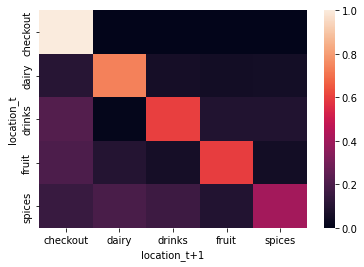

In [86]:
sns.heatmap(tm)
plt.rcParams["figure.figsize"] = (5,5)

#### Writing a Customer Class

In [87]:
class Customer():
    """a single customer that moves through the supermarket
    in a MCMC simmulation
    """
    def __init__(self, name, state, transition_probs):
        self.name = name
        self.state = state
        self.transition_probs = transition_probs        
    
    def __repr__(self):
        return f'<The customer {self.name} is in the {self.state} location.>'
    
    def next_state(self):
        """
        Propagates the customer to the next state
        Returns nothing
        """
        self.state = random.choices(self.transition_probs.index,
                                   self.transition_probs.loc[self.state])[0]
            
    def is_active(self):
        """Returns True if the customer has not reached the checkout yet
        """ 
        if self.state != 'checkout' :
            return True 
        elif self.state == 'checkout' :
            print(f'<The customer {self.name} left the supermarket.>')
            return False

Montecarlo Markov Chain for one customer

In [88]:
f = Faker(['es_MX', 'en_GB', 'it_IT', 'fi_FI'] )

In [89]:
f.first_name()

'Francesca'

In [90]:
cust1 = Customer(f.first_name(),random.choice(tm.drop(columns='checkout').columns),tm)

In [91]:
cust2 = Customer(f.first_name(),random.choice(tm.drop(columns='checkout').columns),tm)

In [92]:
cust1 = Customer(f.first_name(),random.choice(tm.drop(columns='checkout').columns),tm)
for i in range(10) :
    cust1.next_state()
    print(cust1.state)
cust1.is_active()

fruit
spices
dairy
dairy
drinks
fruit
fruit
checkout
checkout
checkout
<The customer Rufino left the supermarket.>


False

In [93]:
cust2 = Customer(f.first_name(),random.choice(tm.drop(columns='checkout').columns),tm)
i=1
while cust2.is_active() == True :
    print(i)
    print(cust2.state)
    print(cust2)
    cust2.next_state()
    i=i+1
print(i)
print(cust2.state)

1
dairy
<The customer Maura is in the dairy location.>
<The customer Maura left the supermarket.>
2
checkout


#### The Supermarket Class

In [94]:
class Supermarket:
    """manages multiple Customers that are currently in the supermarket"""
    
    # initialise supermarket to be empty
    def __init__(self):
        self.customers = []
        self.minutes = 0
        self.last_id = 0
    
    def __repr__(self):        
        return ''
    
    def get_time(self):
        """current time in HH:MM format,
        """
        return None
    
    def all_next_state(self):
        """propagates all customers to the next state"""
        for customer in self.customers:
            customer.next_state()
    
    def print_customers(self):
        """print all customers with the current time and id in CSV format
        """
        return None
        
    def add_customer(self, customer):
        """add a customer to the supermarket
        """
        assert isinstance(customer, Customer), "Only Customers into this Supermarket"
        self.customers.append(customer)
        
    def remove_customers(self):
        """removes every customer that is not active        
        """
        new_customers_list=[]
        for cust in self.customers:
            if cust.is_active:
                new_customers_list.append(cust)
        self.customers = new_customers_list       
        return None

In [97]:
sofrito_market.customers

[]

In [98]:
#instantiate the supermarket:
sofrito_market = Supermarket()

In [99]:
#find a distribution for the probability of a new cust on a given min

In [103]:
#Markovian Process
sofrito_market = Supermarket()
timestep = pd.to_datetime('07:00',format='%H:%M')
#customer_count
df_supermarket = pd.DataFrame(columns=['timestep','cust_name','location'])

for step in range(10): #(15*60=900)
    timestep = timestep + timedelta(minutes=1)
    print(timestep)
    
    #calculate if a new customer is entering the supermarket this minute
    new_customer_coming = random.choices([True,False],[.5,.5])[0]    
    if new_customer_coming == True:
        print('New customer entering Sofrito Market!')
        first_location = random.choices(dfm_1loc_n.index, dfm_1loc_n)[0]
        cust1 = Customer(f.first_name(),first_location,tm)
        sofrito_market.add_customer(cust1)        
    
    for cust in sofrito_market.customers:
        print(cust)
        #record rows for all customers in a dataframe
        d = {'timestep':[timestep],'cust_name':[cust.name],'location':[cust.state]}
        df = pd.DataFrame(data=d, columns=['timestep','cust_name','location'])
        df_supermarket = df_supermarket.append(df)
    
    #move all customers to the next state
    sofrito_market.all_next_state()
        
    #remove inactive customers
    sofrito_market.remove_customers()
    
#after the loop:
#remove customers of the supermarket after checkout
#assign them a checkout record

1900-01-01 07:01:00
1900-01-01 07:02:00
New customer entering Sofrito Market!
<The customer Sergius is in the dairy location.>
1900-01-01 07:03:00
<The customer Sergius is in the dairy location.>
1900-01-01 07:04:00
<The customer Sergius is in the dairy location.>
1900-01-01 07:05:00
<The customer Sergius is in the drinks location.>
1900-01-01 07:06:00
<The customer Sergius is in the dairy location.>
1900-01-01 07:07:00
New customer entering Sofrito Market!
<The customer Sergius is in the dairy location.>
<The customer Katy is in the spices location.>
1900-01-01 07:08:00
<The customer Sergius is in the dairy location.>
<The customer Katy is in the dairy location.>
1900-01-01 07:09:00
<The customer Sergius is in the dairy location.>
<The customer Katy is in the dairy location.>
1900-01-01 07:10:00
<The customer Sergius is in the dairy location.>
<The customer Katy is in the dairy location.>


In [104]:
df_supermarket

,timestep,cust_name,location
0,1900-01-01 07:02:00,Sergius,dairy
0,1900-01-01 07:03:00,Sergius,dairy
0,1900-01-01 07:04:00,Sergius,dairy
0,1900-01-01 07:05:00,Sergius,drinks
0,1900-01-01 07:06:00,Sergius,dairy
0,1900-01-01 07:07:00,Sergius,dairy
0,1900-01-01 07:07:00,Katy,spices
0,1900-01-01 07:08:00,Sergius,dairy
0,1900-01-01 07:08:00,Katy,dairy
0,1900-01-01 07:09:00,Sergius,dairy


In [105]:
sofrito_market.customers

[<The customer Sergius is in the dairy location.>,
 <The customer Katy is in the dairy location.>]

In [106]:
sofrito_market.remove_customers()

In [401]:
sofrito_market.customers

[<The customer Amador is in the checkout location.>,
 <The customer Bethan is in the checkout location.>,
 <The customer Licia is in the drinks location.>]

In [317]:
cust1 = sofrito_market.customers[0]

In [318]:
cust1

<The customer Allan is in the fruit location.>

In [243]:
cust2 = Customer(f.first_name(),random.choice(tm.drop(columns='checkout').columns),tm)

In [ ]:
#after the loop:
#ask the supermarket for customers still active
#assign them a checkout record

In [ ]:
#farther steps
#first: code skeleton with simplications for the steps:

In [175]:
pd.to_datetime('07:00',format='%H:%M')

Timestamp('1900-01-01 07:00:00')

In [178]:
ts = pd.to_datetime('22:00', format='%H:%M')

In [182]:
ts = ts + timedelta(minutes=1)
ts

Timestamp('1900-01-01 22:04:00')

In [210]:
state = random.choices(dfm_1loc_n.index, dfm_1loc_n)

In [280]:
dogs=[]
for i in range(5):
    dogs.append(f'dog{i}')
dogs 

['dog0', 'dog1', 'dog2', 'dog3', 'dog4']

In [222]:
sofrito_market = Supermarket()

In [ ]:
sofrito_market.add_customer(Customer(,tm))

In [346]:
timestep = pd.to_datetime('07:00',format='%H:%M')
for step in range(900): #(15*60)
    timestep = timestep + timedelta(minutes=1)
timestep

Timestamp('1900-01-01 22:00:00')

Next steps:
- Implementation on entry on a Poisson ditribution
- Modelate 11h day 
- Compare synthetic day modelation with original data
- Look for further applications